In [34]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

In [35]:
df = pd.read_csv("data/olympics.csv",skiprows=1)
df.rename(columns={df.columns[0]:"Country"},inplace=True)
df = df.iloc[:-1,:] # drop the last row
df

,Country,№ Summer,01 !,02 !,03 !,Total,№ Winter,01 !.1,02 !.1,03 !.1,Total.1,№ Games,01 !.2,02 !.2,03 !.2,Combined total
0,Afghanistan (AFG),13,0,0,2,2,0,0,0,0,0,13,0,0,2,2
1,Algeria (ALG),12,5,2,8,15,3,0,0,0,0,15,5,2,8,15
2,Argentina (ARG),23,18,24,28,70,18,0,0,0,0,41,18,24,28,70
3,Armenia (ARM),5,1,2,9,12,6,0,0,0,0,11,1,2,9,12
4,Australasia (ANZ) [ANZ],2,3,4,5,12,0,0,0,0,0,2,3,4,5,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141,Yugoslavia (YUG) [YUG],16,26,29,28,83,14,0,3,1,4,30,26,32,29,87
142,Independent Olympic Participants (IOP) [IOP],1,0,1,2,3,0,0,0,0,0,1,0,1,2,3
143,Zambia (ZAM) [ZAM],12,0,1,1,2,0,0,0,0,0,12,0,1,1,2
144,Zimbabwe (ZIM) [ZIM],12,3,4,1,8,1,0,0,0,0,13,3,4,1,8


In [36]:
df_summer = df.iloc[:,1:5]
df_summer['Country'] = df.Country
df_summer.columns = ['NumGames','Gold','Silver','Bronze','Country']
df_winter = df.iloc[:,6:10]
df_winter['Country'] = df.Country
df_winter.columns = ['NumGames','Gold','Silver','Bronze','Country']
df_summer


,NumGames,Gold,Silver,Bronze,Country
0,13,0,0,2,Afghanistan (AFG)
1,12,5,2,8,Algeria (ALG)
2,23,18,24,28,Argentina (ARG)
3,5,1,2,9,Armenia (ARM)
4,2,3,4,5,Australasia (ANZ) [ANZ]
...,...,...,...,...,...
141,16,26,29,28,Yugoslavia (YUG) [YUG]
142,1,0,1,2,Independent Olympic Participants (IOP) [IOP]
143,12,0,1,1,Zambia (ZAM) [ZAM]
144,12,3,4,1,Zimbabwe (ZIM) [ZIM]


In [37]:
df_summer_clean = pd.melt(df_summer,id_vars="Country",
                value_vars=["Gold","Silver","Bronze"],var_name="Type",value_name="NumWon")
df_winter_clean = pd.melt(df_winter,id_vars="Country",
                value_vars=["Gold","Silver","Bronze"],var_name="Type",value_name="NumWon")
df_summer_clean["Season"] = "Summer"
df_winter_clean["Season"] = "Winter"
df_clean = pd.concat([df_summer_clean, df_winter_clean],axis=0)
df_clean.reset_index(inplace=True,drop=True)
df_clean

,Country,Type,NumWon,Season
0,Afghanistan (AFG),Gold,0,Summer
1,Algeria (ALG),Gold,5,Summer
2,Argentina (ARG),Gold,18,Summer
3,Armenia (ARM),Gold,1,Summer
4,Australasia (ANZ) [ANZ],Gold,3,Summer
...,...,...,...,...
871,Yugoslavia (YUG) [YUG],Bronze,1,Winter
872,Independent Olympic Participants (IOP) [IOP],Bronze,0,Winter
873,Zambia (ZAM) [ZAM],Bronze,0,Winter
874,Zimbabwe (ZIM) [ZIM],Bronze,0,Winter


In [38]:

df_grouped = df_clean.groupby(by =["Country","Season"]).sum()
df_grouped.reset_index(level=1)


,Season,NumWon
Country,,
Afghanistan (AFG),Summer,2
Afghanistan (AFG),Winter,0
Algeria (ALG),Summer,15
Algeria (ALG),Winter,0
Argentina (ARG),Summer,70
...,...,...
Yugoslavia (YUG) [YUG],Winter,4
Zambia (ZAM) [ZAM],Summer,2
Zambia (ZAM) [ZAM],Winter,0


matplotlib.lines.Line2D

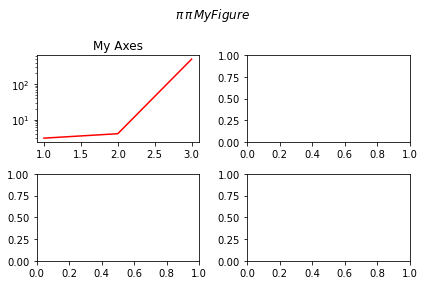

In [69]:
fig,ax = plt.subplots(2,2) #create a figure with a blank axes object
fig.suptitle('$My Figure$')
ax[0,0].set_title("My Axes")
line = ax[0,0].plot([1,2,3],[3,4,500])

line[0].set_color("red")
ax[0,0].set_yscale("log")
#ax[0,0].set_ylim([0,5])
#ax[0,0].set_yticks([0,1,2,3,4,5])
#ax[0,0].set_yticklabels(["zero",1,2,3,4,5])

fig.tight_layout()
type(line[0])
